In [1]:
import sys
import cv2
import matplotlib.pyplot as plt
# adding Folder_2 to the system path
sys.path.insert(0, '../src')

from ANNwithPatchMatch import getANNShiftmap
from ReconstructingTheImage import reconstruct
from ConstructingTextures import constructingTextures
import numpy as np

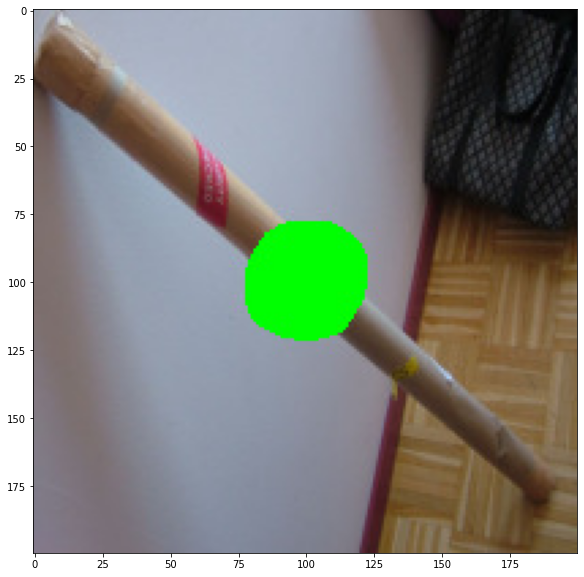

In [2]:
image=cv2.imread("../images/stick.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(10, 10))
plt.imshow(image)

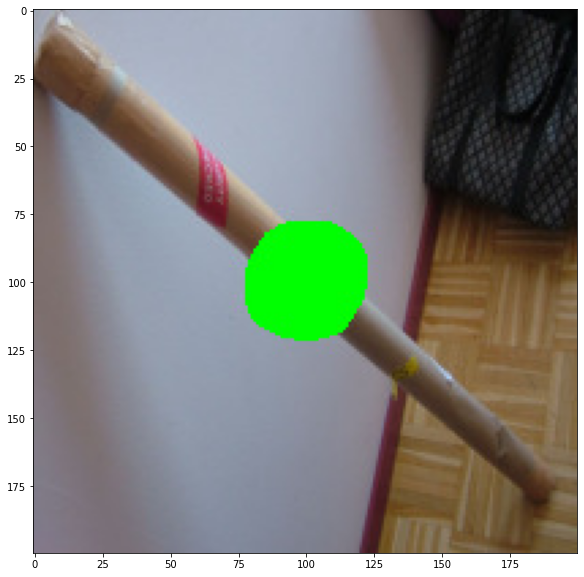

In [3]:
m,n,_=image.shape
H=[]
for i in range(m):
    for j in range(n):
        if image[i,j,1]>240:
            H.append([i,j])
#             image[i,j]=[0,0,0]
H=np.array(H,dtype=int)
fig = plt.figure(figsize=(10, 10))
plt.imshow(image)

In [4]:
shiftmap=getANNShiftmap(np.copy(image), H, 10, 7)

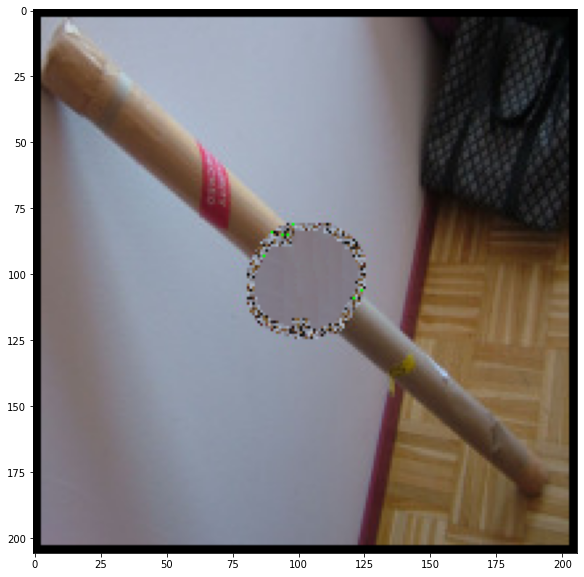

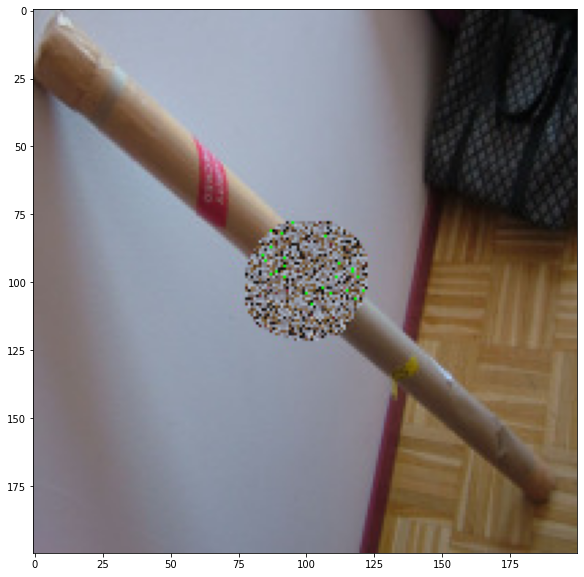

In [5]:
reconImage,randomImg=reconstruct(image, shiftmap, H,7)
fig = plt.figure(figsize=(10, 10))
plt.imshow(reconImage)
plt.show()
fig = plt.figure(figsize=(10, 10))
plt.imshow(randomImg)
plt.show()

In [6]:
print(len(H))

1635


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


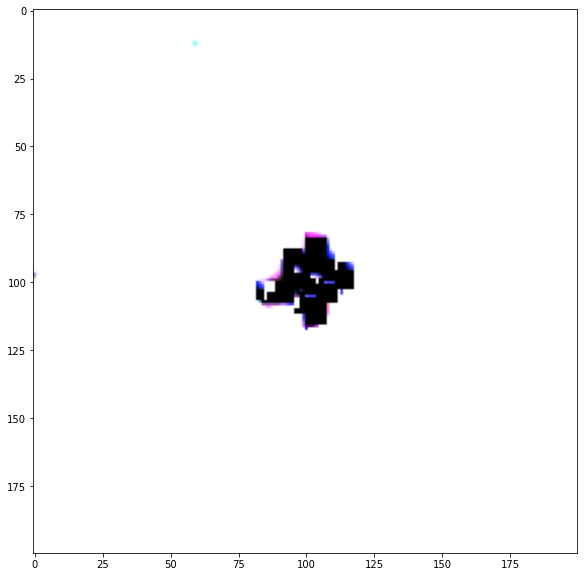

In [15]:
fig = plt.figure(figsize=(10, 10))
t = constructingTextures(image, H, 7, 20, shiftmap, 500)
plt.imshow(t)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


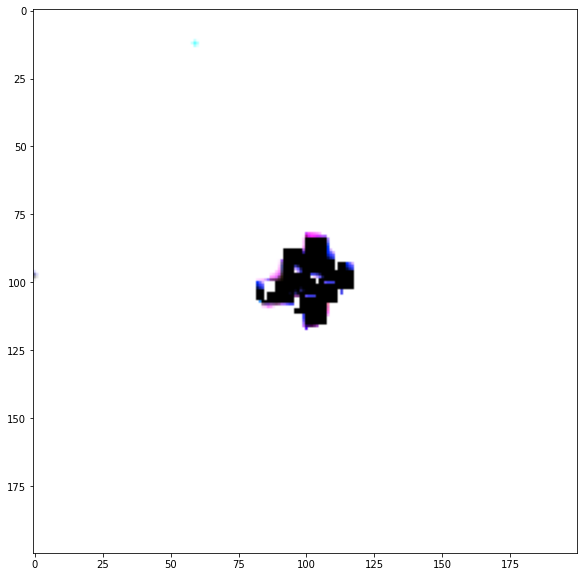

In [16]:
fig = plt.figure(figsize=(10, 10))
t = (t/np.amax(t) ) *255
# plt.imshow(t.astype(np.uint8))
# print(t)
plt.imshow(t)


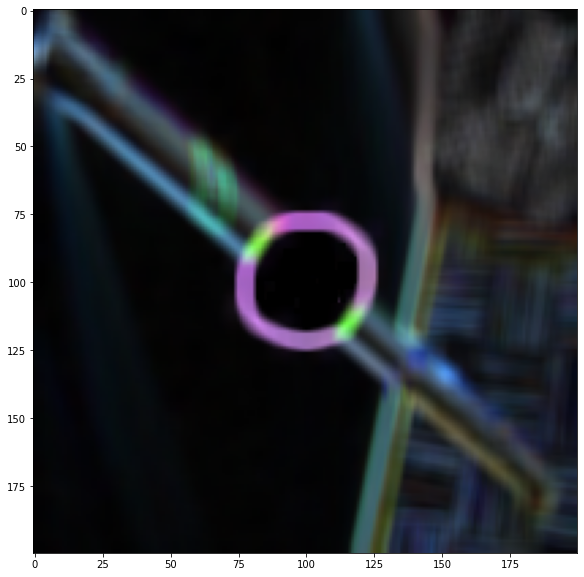

In [17]:
fig = plt.figure(figsize=(10, 10))
ast = t.astype(np.uint8)
plt.imshow(ast)